In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

data_FPT = pd.read_csv('FPT.csv')

In [6]:
dropdata = ['Ticker', 'Date/Time']
data_FPT_new = data_FPT.drop(dropdata, axis=1)

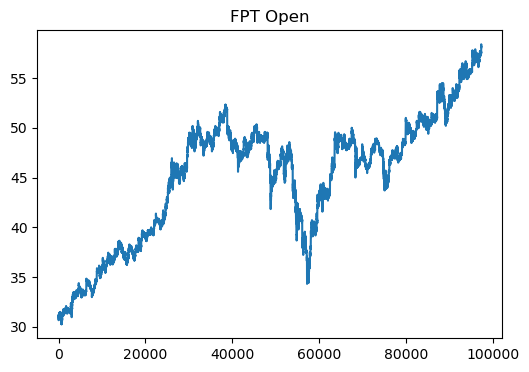

In [7]:
data_FPT['Open'].plot(label='FPT stook',figsize=(6,4), title = ('FPT Open'));

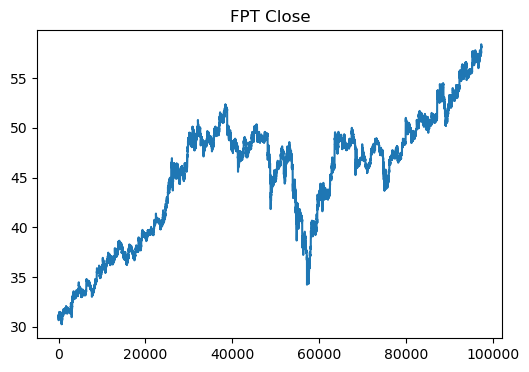

In [8]:
data_FPT['Close'].plot(label='FPT close', figsize=(6,4), title ='FPT Close');

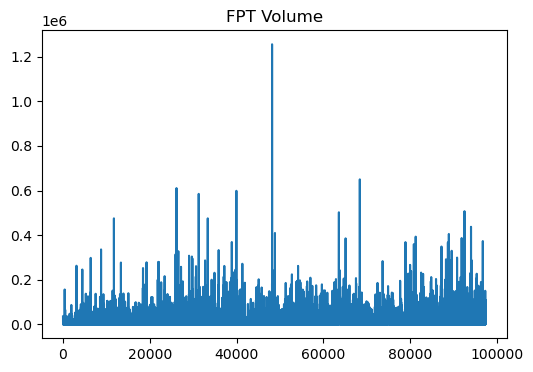

In [9]:
data_FPT['Volume'].plot(label='FPT Volume', figsize=(6,4), title ='FPT Volume');


In [10]:
data_FPT['total traded'] = data_FPT['Open'] * data_FPT['Volume']

Text(0.5, 1.0, 'total traded')

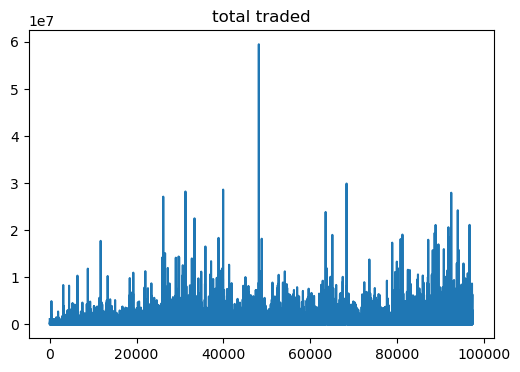

In [12]:
fig, ax = plt.subplots(figsize =(6,4))
ax.plot(data_FPT['total traded'], label = 'FPT')
ax.set_title('total traded')

In [13]:
data_FPT['returns'] = data_FPT['Close'].pct_change(1)

In [14]:
data_FPT_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           97406 non-null  float64
 1   High           97406 non-null  float64
 2   Low            97406 non-null  float64
 3   Close          97406 non-null  float64
 4   Volume         97406 non-null  int64  
 5   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 4.5 MB


In [15]:
data_FPT_new.fillna(value=-999, inplace=True)

In [16]:
data_train = data_FPT_new[:90000]
data_test = data_FPT_new[90000:]

In [17]:
X_train = data_train.drop(['Close'], 1)
y_train = np.array(data_train['Close'])
x_test = data_test.drop(['Close'], 1)
y_test = data_test['Close']

C:\Users\Computer\AppData\Local\Temp\ipykernel_4200\2846286374.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = data_train.drop(['Close'], 1)
C:\Users\Computer\AppData\Local\Temp\ipykernel_4200\2846286374.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = data_test.drop(['Close'], 1)


In [18]:
clfreg = LinearRegression().fit(X_train, y_train) 
y_pred =clfreg.predict(x_test)
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print(rmse)


0.03587592712302218


C:\Users\Computer\AppData\Local\Temp\ipykernel_4200\236551794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = y_pred


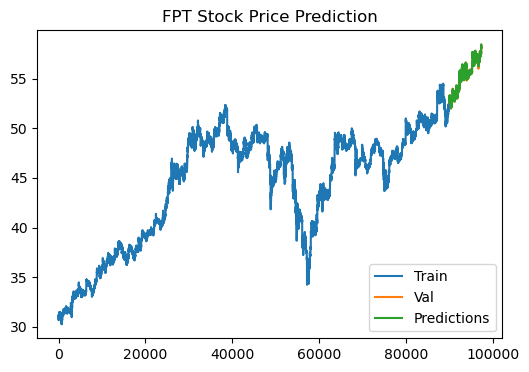

In [19]:
# Dự đoán biến động cổ phiếu FPT
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.title('FPT Stock Price Prediction')
data_test['Predictions'] = y_pred
plt.plot(data_train['Close'])
plt.plot(data_test[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right');